# **Import Libraries**

In [ ]:
!pip install mapclassify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import matplotlib
import mapclassify
import dask.dataframe as dd
from scipy.spatial import cKDTree

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Mapping San Diego**

In [ ]:
# Read San Diego source file using geopandas
sd_gpd = gpd.read_file("/content/drive/MyDrive/Capstone/Data/SanDiegoMetroArea/Municipal_Boundaries.shp")
sd_gpd.head()

,OBJECTID,NAME,CODE,ORIG_FID,Shape_Leng,Shape_Area,SqKM,geometry
0,1,CARLSBAD,CB,1,177984.708599,1.089968e+09,101.26200,"POLYGON ((-13057788.845 3919546.067, -13057780..."
1,2,CHULA VISTA,CV,2,325252.074981,1.453371e+09,135.02300,"POLYGON ((-13018760.82 3852693.446, -13018760...."
2,3,CORONADO,CO,3,133335.366973,3.914438e+08,36.36650,"POLYGON ((-13037585.285 3841173.674, -13037808..."
3,4,DEL MAR,DM,4,40989.526343,4.994854e+07,4.64039,"POLYGON ((-13052880.988 3892593.228, -13052881..."
4,5,EL CAJON,EC,5,237132.584978,4.051479e+08,37.63960,"POLYGON ((-13022569.589 3872804.145, -13022517..."


In [ ]:
# Only select the names of the counties
sd_gpd = sd_gpd.set_index("NAME")

In [ ]:
# Get area of cities
sd_gpd["area"] = sd_gpd.area
sd_gpd["area"]

,area
NAME,
CARLSBAD,1.447791e+08
CHULA VISTA,1.908929e+08
CORONADO,5.145494e+07
DEL MAR,6.610414e+06
EL CAJON,5.342309e+07
ENCINITAS,7.240296e+07
ESCONDIDO,1.377800e+08
ESCONDIDO,1.906946e+05
IMPERIAL BEACH,1.623593e+07


In [ ]:
# Get boundaries of cities
sd_gpd["boundary"] = sd_gpd.boundary
sd_gpd["boundary"]

,boundary
NAME,
CARLSBAD,"LINESTRING (-13057788.845 3919546.067, -130577..."
CHULA VISTA,"MULTILINESTRING ((-13018760.82 3852693.446, -1..."
CORONADO,"LINESTRING (-13037585.285 3841173.674, -130378..."
DEL MAR,"LINESTRING (-13052880.988 3892593.228, -130528..."
EL CAJON,"LINESTRING (-13022569.589 3872804.145, -130225..."
ENCINITAS,"LINESTRING (-13049296.517 3904394.421, -130492..."
ESCONDIDO,"MULTILINESTRING ((-13023712.323 3909799.677, -..."
ESCONDIDO,"LINESTRING (-13026275.513 3919389.456, -130262..."
IMPERIAL BEACH,"LINESTRING (-13037620.605 3833715.156, -130376..."


In [ ]:
# Get center of cities
sd_gpd["centroid"] = sd_gpd.centroid
sd_gpd["centroid"]

,centroid
NAME,
CARLSBAD,POINT (-13055943.18 3911861.991)
CHULA VISTA,POINT (-13025986.674 3846045.384)
CORONADO,POINT (-13042177.564 3850707.843)
DEL MAR,POINT (-13053600.989 3890462.66)
EL CAJON,POINT (-13019978.167 3869010.759)
ENCINITAS,POINT (-13053458.124 3901822.699)
ESCONDIDO,POINT (-13032416.168 3913214.855)
ESCONDIDO,POINT (-13026583.884 3919327.417)
IMPERIAL BEACH,POINT (-13037555.58 3838224.826)


In [ ]:
# Get distance size of cities
first_point = sd_gpd["centroid"].iloc[0]
sd_gpd["distance"] = sd_gpd["centroid"].distance(first_point)
sd_gpd["distance"]

,distance
NAME,
CARLSBAD,0.000000
CHULA VISTA,72313.332056
CORONADO,62684.303832
DEL MAR,21527.127553
EL CAJON,55943.813113
ENCINITAS,10342.286226
ESCONDIDO,23565.876513
ESCONDIDO,30293.577634
IMPERIAL BEACH,75898.194306


In [ ]:
# Get mean distance size of cities
sd_gpd["distance"].mean()

31213.83831423884

In [ ]:
# Show city areas on an interactable map
sd_gpd.explore("area", legend=False)

Output hidden; open in https://colab.research.google.com to view.

*******Not entirely sure what the buffer is telling us****

In [ ]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
sd_gpd["buffered"] = sd_gpd.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
sd_gpd["buffered_centroid"] = sd_gpd["centroid"].buffer(10000)

<Axes: >

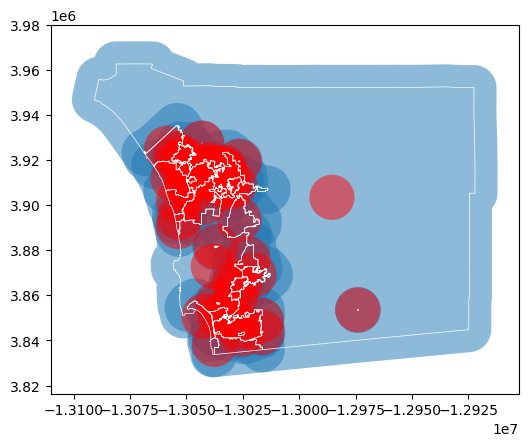

In [ ]:
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = sd_gpd["buffered"].plot(alpha=0.5)

# passing the first plot as an axis to the second
sd_gpd["buffered_centroid"].plot(ax=ax, color="red", alpha=0.5)

# passing the first plot and setting linewidth to 0.5
sd_gpd["boundary"].plot(ax=ax, color="white", linewidth=0.5)

<Axes: >

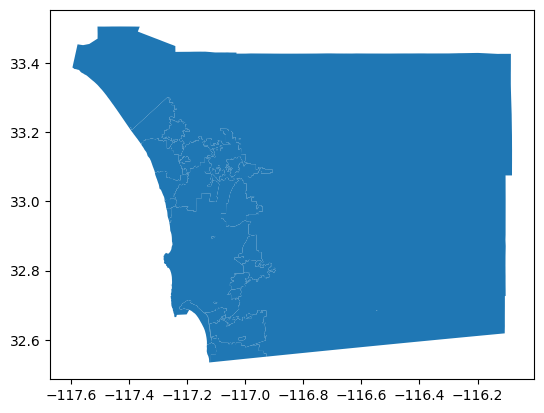

In [ ]:
# Convert latitude and longitude to degrees
sd_gpd = sd_gpd.to_crs("EPSG:4326")
sd_gpd.plot()

## **US Accidents Data**

In [ ]:
# Load large CSV with Dask
accidents_df = dd.read_csv('/content/drive/MyDrive/Capstone/Data/US_Accidents_March23.csv')
accidents_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Compute the number of rows
accidents_num_rows = accidents_df.shape[0].compute()

# Compute the number of columns
accidents_num_columns = accidents_df.shape[1]

# Display the total rows and columns
print(f"Num Rows: {accidents_num_rows}, Num Columns: {accidents_num_columns}")

Num Rows: 7728394, Num Columns: 46


In [ ]:
# Check the data types
accidents_df.dtypes

,0
ID,string[pyarrow]
Source,string[pyarrow]
Severity,int64
Start_Time,string[pyarrow]
End_Time,string[pyarrow]
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


In [ ]:
# Initialize an empty list to store filtered Dask DataFrames for each city
filtered_frame = []

# Loop over each city in the NAME column
for _, city in sd_gpd.iterrows():
    # Get the bounding box for the current city
    min_longitude, min_latitude, max_longitude, max_latitude = city.geometry.bounds

    # Filter the rows within this bounding box
    city_filtered = accidents_df[
        (accidents_df['Start_Lng'] >= min_longitude) & (accidents_df['Start_Lng'] <= max_longitude) &
        (accidents_df['Start_Lat'] >= min_latitude) & (accidents_df['Start_Lat'] <= max_latitude)
    ]

    # Append each filtered DataFrame to the list
    filtered_frame.append(city_filtered)

# Concatenate all filtered frames with Dask's concat
sd_accidents_df = dd.concat(filtered_frame)

# Remove duplicate rows, if any
sd_accidents_df = sd_accidents_df.drop_duplicates()

# Compute the result to obtain a concrete DataFrame
sd_accidents_df = sd_accidents_df.compute()
sd_accidents_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42968,A-42969,Source2,3,2016-06-21 14:08:48,2016-06-21 14:53:48,33.084377,-117.298370,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
42975,A-42976,Source2,3,2016-06-21 14:21:03,2016-06-21 15:06:03,33.152199,-117.336304,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
42978,A-42979,Source2,3,2016-06-21 14:35:48,2016-06-21 15:20:48,33.069042,-117.293587,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
43137,A-43138,Source2,2,2016-06-21 20:38:49,2016-06-21 21:23:49,33.152874,-117.295479,NaN,NaN,0.0,...,False,False,False,False,False,False,Night,Night,Day,Day
43217,A-43218,Source2,3,2016-06-22 09:37:34,2016-06-22 10:18:00,33.065647,-117.292549,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# Get number of rows and columns
sd_accidents_df.shape

(107358, 46)

In [ ]:
# Summary statistics for numerical columns
sd_accidents_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,107358.000000,107358.000000,107358.000000,69601.000000,69601.000000,107358.000000,104973.000000,72432.000000,104680.000000,106625.000000,106385.000000,99178.000000,75873.000000
mean,2.215913,32.940471,-117.163907,32.941808,-117.170318,0.490218,64.396942,63.148118,64.583158,29.745199,9.042163,6.480644,0.005564
std,0.431825,0.235288,0.108226,0.237198,0.098353,1.287743,10.241522,10.495221,21.004995,0.380230,2.142224,4.234709,0.029828
min,1.000000,32.542587,-117.595330,32.542032,-117.603085,0.000000,-29.900000,-1.000000,1.000000,28.130000,0.000000,0.000000,0.000000
25%,2.000000,32.750347,-117.217286,32.749247,-117.219081,0.000000,57.900000,56.000000,53.000000,29.580000,10.000000,3.500000,0.000000
50%,2.000000,32.856596,-117.147835,32.857165,-117.149927,0.032000,64.000000,63.000000,68.000000,29.870000,10.000000,6.900000,0.000000
75%,2.000000,33.133016,-117.105370,33.136766,-117.108380,0.462000,71.000000,70.000000,80.000000,29.990000,10.000000,9.000000,0.000000
max,4.000000,33.505274,-116.102140,33.543327,-116.096730,22.570000,111.000000,111.000000,100.000000,30.540000,10.000000,100.100000,0.820000


# Identifying and Handling Missing Values

In [ ]:
# Check for missing values
accidents_missing_values = sd_accidents_df.isnull().sum()
accidents_missing_values[accidents_missing_values > 0]

,0
End_Lat,37757
End_Lng,37757
Street,308
Weather_Timestamp,538
Temperature(F),2385
Wind_Chill(F),34926
Humidity(%),2678
Pressure(in),733
Visibility(mi),973
Wind_Direction,1955


In [ ]:
# Drop rows with any missing values
accidents_df_cleaned = sd_accidents_df.dropna()

# Compute the result to get a concrete Dask DataFrame
accidents_df_cleaned = accidents_df_cleaned

# Check the shape of the cleaned DataFrame
accidents_df_cleaned.shape

(58587, 46)

# Converting Data Types

Categorical Columns

In [ ]:
# Converting string[pyarrow] and boolean data types from Dask to Categorical Variables
accidents_categorical_cols = [
    'Source', 'Description', 'Street', 'City', 'County', 'State',
    'Zipcode', 'Country', 'Timezone', 'Airport_Code',
    'Wind_Direction', 'Weather_Condition',
    'Sunrise_Sunset', 'Civil_Twilight',
    'Nautical_Twilight', 'Astronomical_Twilight', 'Amenity',
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

for col in accidents_categorical_cols:
    accidents_df_cleaned[col] = accidents_df_cleaned[col].astype('category')

<ipython-input-128-67dddac256d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned[col] = accidents_df_cleaned[col].astype('category')
<ipython-input-128-67dddac256d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned[col] = accidents_df_cleaned[col].astype('category')
<ipython-input-128-67dddac256d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Date/Times

In [ ]:
# Check the unique lengths of the Start_Time column and compute the result
start_time_lengths = accidents_df_cleaned['Start_Time'].str.len().value_counts()
start_time_lengths

,count
Start_Time,
19,47818
29,9924
26,845


In [ ]:
# Check the unique lengths of the End_Time column and compute the result
end_time_lengths = accidents_df_cleaned['End_Time'].str.len().value_counts()
end_time_lengths

,count
End_Time,
19,47818
29,9924
26,845


In [ ]:
# Check the unique lengths of the Weather_Timestamp column and compute the result
Weather_timestamp_lengths = accidents_df_cleaned['Weather_Timestamp'].str.len().value_counts()
Weather_timestamp_lengths

,count
Weather_Timestamp,
19,58587


In [ ]:
# Filter for Start_Time values with more than 19 characters
long_start_time_rows = accidents_df_cleaned[accidents_df_cleaned['Start_Time'].str.len() > 19]

# Display the head of the sampled rows
long_start_time_rows.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
169538,A-3651183,Source1,2,2023-03-23 11:31:00.000000000,2023-03-23 13:47:16.000000000,33.182330,-117.355845,33.172487,-117.348037,0.816,...,False,False,False,False,False,False,Day,Day,Day,Day
170122,A-3652043,Source1,2,2023-03-31 12:54:30.000000000,2023-03-31 14:05:30.000000000,33.083938,-117.297885,33.099261,-117.307704,1.202,...,False,False,False,False,False,False,Day,Day,Day,Day
170415,A-3652472,Source1,2,2023-03-21 07:45:00.000000000,2023-03-21 09:58:29.000000000,33.109949,-117.314617,33.118333,-117.319638,0.648,...,False,False,False,False,False,False,Day,Day,Day,Day
170493,A-3652587,Source1,2,2023-03-18 11:49:00.000000000,2023-03-18 19:20:07.000000000,33.164606,-117.216627,33.164998,-117.216290,0.033,...,False,True,False,False,True,False,Day,Day,Day,Day
170803,A-3653083,Source1,2,2023-03-21 06:31:00.000000000,2023-03-21 08:44:29.000000000,33.068057,-117.293001,33.076209,-117.295463,0.581,...,False,False,False,False,False,False,Night,Day,Day,Day


In [ ]:
# Truncate Start_Time and End_Time to the first 19 characters
accidents_df_cleaned['Start_Time'] = accidents_df_cleaned['Start_Time'].str.slice(0, 19)
accidents_df_cleaned['End_Time'] = accidents_df_cleaned['End_Time'].str.slice(0, 19)

<ipython-input-133-69ea829a3f44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned['Start_Time'] = accidents_df_cleaned['Start_Time'].str.slice(0, 19)
<ipython-input-133-69ea829a3f44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned['End_Time'] = accidents_df_cleaned['End_Time'].str.slice(0, 19)


In [ ]:
# Converting Start Time, End Time and Weather Timestamp to datetime formats
accidents_df_cleaned['Start_Time'] = pd.to_datetime(accidents_df_cleaned['Start_Time'], errors='coerce')
accidents_df_cleaned['End_Time'] = pd.to_datetime(accidents_df_cleaned['End_Time'], errors='coerce')
accidents_df_cleaned['Weather_Timestamp'] = pd.to_datetime(accidents_df_cleaned['Weather_Timestamp'], errors='coerce')

<ipython-input-134-6fe4dd04d70d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned['Start_Time'] = pd.to_datetime(accidents_df_cleaned['Start_Time'], errors='coerce')
<ipython-input-134-6fe4dd04d70d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_df_cleaned['End_Time'] = pd.to_datetime(accidents_df_cleaned['End_Time'], errors='coerce')
<ipython-input-134-6fe4dd04d70d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
# Identify rows with NaT values after conversion
na_rows = accidents_df_cleaned[accidents_df_cleaned['Start_Time'].isna() | accidents_df_cleaned['End_Time'].isna() | accidents_df_cleaned['Weather_Timestamp'].isna()]
na_rows.count().sum()

0

## **SOC San Diego Traffic Data**

In [ ]:
# Load the SOC CSV file
soc_df = pd.read_csv('/content/drive/MyDrive/Capstone/Data/SOC_San_Diego_Speed_and_Volume.csv')

# Assumes geometry format is "LINESTRING (longitude latitude, longitude latitude, ...)"
soc_df[['longitude', 'latitude']] = soc_df['geometry'].str.extract(r'LINESTRING \(([-.\d]+) ([-.\d]+)')

# Convert extracted longitude and latitude columns to float
soc_df['longitude'] = soc_df['longitude'].astype(float)
soc_df['latitude'] = soc_df['latitude'].astype(float)

# Show the first five rows
soc_df.head()

,osm_id,Street Name,Highway,Lanes,Speed Limit MPH,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,geometry,longitude,latitude
0,153343706,"Orange Avenue, CA 75",primary,2,40,43.61,S,AM,18.0,18.8,-4.0,"10,000-19,999","10,000-19,999",13.5,LINESTRING (-117.178938176757 32.6836120192024...,-117.178938,32.683612
1,153343706,"Orange Avenue, CA 75",primary,2,40,43.61,S,PM,16.9,17.3,-2.5,"10,000-19,999","10,000-19,999",13.5,LINESTRING (-117.178938176757 32.6836120192024...,-117.178938,32.683612
2,161508068,Nimitz Boulevard,primary,-1,40,41.71,SE,AM,16.2,16.6,-2.1,"5,000-9,999","5,000-9,999",-2.6,LINESTRING (-117.221695942172 32.7260512722891...,-117.221696,32.726051
3,161508068,Nimitz Boulevard,primary,-1,40,41.71,SE,PM,16.5,19.7,-16.4,"5,000-9,999","5,000-9,999",-2.6,LINESTRING (-117.221695942172 32.7260512722891...,-117.221696,32.726051
4,186470511,Pacific Highway,primary,2,50,94.44,SE,AM,36.5,NaN,NaN,"5,000-9,999",NaN,NaN,LINESTRING (-117.195756931508 32.7457416671308...,-117.195757,32.745742


In [ ]:
# Compute the number of rows
soc_num_rows = soc_df.shape[0]

# Compute the number of columns
soc_num_columns = soc_df.shape[1]

# Display the total rows and columns
print(f"Num Rows: {soc_num_rows}, Num Columns: {soc_num_columns}")

Num Rows: 78312, Num Columns: 17


In [ ]:
# Check the data types
soc_df.dtypes

,0
osm_id,int64
Street Name,object
Highway,object
Lanes,int64
Speed Limit MPH,int64
Length,float64
Direction,object
PeakPeriod,object
Speed 2022 MPH,float64
Speed 2021 MPH,float64


In [ ]:
# Initialize an empty list to store filtered pandas DataFrames for each city
filtered_df = []

# Loop over each city in the NAME column in sd_gdf
for _, city in sd_gpd.iterrows():
    # Get the bounding box for the current city
    min_longitude, min_latitude, max_longitude, max_latitude = city.geometry.bounds

    # Filter soc_df to include only rows within this bounding box
    city_filtered = soc_df[
        (soc_df['longitude'] >= min_longitude) & (soc_df['longitude'] <= max_longitude) &
        (soc_df['latitude'] >= min_latitude) & (soc_df['latitude'] <= max_latitude)
    ]

    # Append each filtered DataFrame to the list
    filtered_df.append(city_filtered)

# Concatenate all filtered frames
sd_soc_df = pd.concat(filtered_df)

# Remove duplicate rows, if any
sd_soc_df = sd_soc_df.drop_duplicates()

# Show the final filtered DataFrame
sd_soc_df.head()

,osm_id,Street Name,Highway,Lanes,Speed Limit MPH,Length,Direction,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,geometry,longitude,latitude
106,33727620,"Palomar Airport Road, S12",primary,3,40,25.99,SE,AM,14.8,17.6,-15.9,"5,000-9,999","10,000-19,999",-10.1,LINESTRING (-117.324957266263 33.1223165569227...,-117.324957,33.122317
107,33727620,"Palomar Airport Road, S12",primary,3,40,25.99,SE,PM,13.3,14.3,-6.8,"5,000-9,999","10,000-19,999",-10.1,LINESTRING (-117.324957266263 33.1223165569227...,-117.324957,33.122317
165,393555889,"North Coast Highway 101, S21",primary,2,40,28.95,SE,AM,29.1,29.1,0.0,"5,000-9,999","10,000-19,999",-29.3,LINESTRING (-117.305077254141 33.0726567597536...,-117.305077,33.072657
166,393555889,"North Coast Highway 101, S21",primary,2,40,28.95,SE,PM,27.9,28.4,-1.5,"5,000-9,999","10,000-19,999",-29.3,LINESTRING (-117.305077254141 33.0726567597536...,-117.305077,33.072657
167,404648983,"Carlsbad Boulevard, S21",primary,2,28,137.01,SE,AM,28.8,27.4,5.4,"20,000-39,999","20,000-39,999",-33.4,LINESTRING (-117.344829827804 33.1468529957575...,-117.344830,33.146853


In [ ]:
# Get number of rows and columns
sd_soc_df.shape

(78312, 17)

In [ ]:
# Summary statistics for numerical columns
sd_soc_df.describe()

,osm_id,Lanes,Speed Limit MPH,Length,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,1 year AADT % change,longitude,latitude
count,7.831200e+04,78312.000000,78312.000000,78312.000000,76191.000000,67984.000000,67984.000000,66509.000000,78312.000000,78312.000000
mean,4.338055e+08,1.417509,37.456737,85.167106,27.080429,27.597742,-2.176356,-9.058806,-117.103408,32.887494
std,2.643668e+08,1.785224,4.427586,196.857588,9.320308,9.063428,7.328474,40.130311,0.150556,0.204181
min,5.938374e+06,-1.000000,9.000000,0.140000,4.700000,4.700000,-58.600000,-85.500000,-117.593708,32.543754
25%,2.758208e+08,-1.000000,37.000000,21.607500,20.300000,21.100000,-6.000000,-19.900000,-117.208690,32.742754
50%,4.363091e+08,2.000000,37.000000,43.190000,25.400000,26.300000,-2.000000,-10.000000,-117.111902,32.822424
75%,4.365754e+08,3.000000,40.000000,82.820000,32.400000,33.300000,1.600000,-1.300000,-117.035247,33.067387
max,1.091082e+09,7.000000,84.000000,13928.500000,66.300000,63.500000,79.200000,5700.000000,-116.083199,33.462414


In [ ]:
# Converting string[pyarrow] from Dask to Categorical Variables
soc_categorical_cols = [
    'Street Name', 'Highway', 'Direction', 'PeakPeriod'
]

for col in soc_categorical_cols:
    sd_soc_df[col] = sd_soc_df[col].astype('category')

In [ ]:
# Check for missing values
soc_missing_values = sd_soc_df.isnull().sum()
soc_missing_values[soc_missing_values > 0]

,0
Street Name,300
PeakPeriod,2121
Speed 2022 MPH,2121
Speed 2021 MPH,10328
1 year Speed % change,10328
2022 AADT Range,2
2021 AADT Range,11803
1 year AADT % change,11803


In [ ]:
# Drop rows with any missing values
soc_df_cleaned = sd_soc_df.dropna()

# Check the shape of the cleaned DataFrame
soc_df_cleaned.shape

(63884, 17)

## **Weather Data**

In [ ]:
# Load the bulk OpenWeather CSV file
weather_df = pd.read_csv('/content/drive/MyDrive/Capstone/Data/OpenWeatherBulk.csv')
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1262304000,2010-01-01 00:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,63.70,10000.0,49.12,62.55,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
1,1262307600,2010-01-01 01:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,61.72,10000.0,48.58,60.51,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
2,1262311200,2010-01-01 02:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,60.82,10000.0,45.97,59.32,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
3,1262314800,2010-01-01 03:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,59.13,10000.0,47.79,57.85,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,1262318400,2010-01-01 04:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,58.23,10000.0,46.53,56.80,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n


In [ ]:
# Convert dt_iso to datetime
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Convert from UTC to PST (Pacific Time Zone)
weather_df['dt_iso'] = weather_df['dt_iso'].dt.tz_convert('America/Los_Angeles')

# Check the conversion
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1262304000,2009-12-31 16:00:00-08:00,-28800,San Diego,32.715738,-117.161084,63.70,10000.0,49.12,62.55,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
1,1262307600,2009-12-31 17:00:00-08:00,-28800,San Diego,32.715738,-117.161084,61.72,10000.0,48.58,60.51,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
2,1262311200,2009-12-31 18:00:00-08:00,-28800,San Diego,32.715738,-117.161084,60.82,10000.0,45.97,59.32,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
3,1262314800,2009-12-31 19:00:00-08:00,-28800,San Diego,32.715738,-117.161084,59.13,10000.0,47.79,57.85,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,1262318400,2009-12-31 20:00:00-08:00,-28800,San Diego,32.715738,-117.161084,58.23,10000.0,46.53,56.80,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n


## **Combine Accident and Traffic Data for San Diego**

Retain all accident data and add traffic data based on nearest latitude and longitude coordinates

In [ ]:
from scipy.spatial import cKDTree

# Convert coordinates to numpy arrays for KDTree
accidents_coords = sd_accidents_df[['Start_Lat', 'Start_Lng']].to_numpy()
soc_coords = sd_soc_df[['latitude', 'longitude']].to_numpy()

# Build KDTree for soc data coordinates
soc_tree = cKDTree(soc_coords)

# Find the nearest neighbor in sd_soc_df for each point in sd_accidents_df
distances, indices = soc_tree.query(accidents_coords)

# Extract the nearest rows from sd_soc_df based on the nearest neighbors
nearest_soc_data = sd_soc_df.iloc[indices].reset_index(drop=True)

# Concatenate the nearest soc data to the original sd_accidents_df
combined_df = pd.concat([sd_accidents_df.reset_index(drop=True), nearest_soc_data], axis=1)

# Show the result
combined_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,PeakPeriod,Speed 2022 MPH,Speed 2021 MPH,1 year Speed % change,2022 AADT Range,2021 AADT Range,1 year AADT % change,geometry,longitude,latitude
0,A-42969,Source2,3,2016-06-21 14:08:48,2016-06-21 14:53:48,33.084377,-117.298370,NaN,NaN,0.0,...,PM,31.6,31.9,-1.1,"20,000-39,999","20,000-39,999",-10.7,LINESTRING (-117.298353477531 33.0841876510722...,-117.298353,33.084188
1,A-42976,Source2,3,2016-06-21 14:21:03,2016-06-21 15:06:03,33.152199,-117.336304,NaN,NaN,0.0,...,AM,17.5,17.3,1.4,"10,000-19,999","10,000-19,999",1.4,LINESTRING (-117.336269296771 33.1522239331653...,-117.336269,33.152224
2,A-42979,Source2,3,2016-06-21 14:35:48,2016-06-21 15:20:48,33.069042,-117.293587,NaN,NaN,0.0,...,PM,21.3,21.5,-0.8,"5,000-9,999","5,000-9,999",-13.3,LINESTRING (-117.293693139263 33.0651743277574...,-117.293693,33.065174
3,A-43138,Source2,2,2016-06-21 20:38:49,2016-06-21 21:23:49,33.152874,-117.295479,NaN,NaN,0.0,...,PM,23.2,29.2,-20.5,"10,000-19,999","10,000-19,999",-27.4,"LINESTRING (-117.295107632021 33.15201103282, ...",-117.295108,33.152011
4,A-43218,Source2,3,2016-06-22 09:37:34,2016-06-22 10:18:00,33.065647,-117.292549,NaN,NaN,0.0,...,AM,21.7,23.7,-8.3,"10,000-19,999","10,000-19,999",-9.1,LINESTRING (-117.292728847848 33.0651689260863...,-117.292729,33.065169


In [ ]:
combined_df.shape

(107358, 63)

In [ ]:
missing_start_time = combined_df['Start_Time'].isna().sum()
print(f"Rows with missing Start_Time: {missing_start_time}")

Rows with missing Start_Time: 0


In [ ]:
combined_df['Start_Time'].dropna()
combined_df.shape

(107358, 63)

In [ ]:
# Convert 'Start_Time' in combined_df to datetime and localize to 'America/Los_Angeles'
combined_df['Start_Time'] = pd.to_datetime(combined_df['Start_Time'], errors='coerce')
combined_df['Start_Time'] = combined_df['Start_Time'].dt.tz_localize('America/Los_Angeles', ambiguous='NaT', nonexistent='NaT')

# Ensure 'dt_iso' in weather_df is in the correct timezone (already PST)
# Sort weather_df by 'dt_iso' to prepare for merging
weather_df = weather_df.sort_values('dt_iso').reset_index(drop=True)

# Function to find the index of the nearest timestamp in weather_df for each 'Start_Time'
def find_nearest_weather_time(start_time):
    if pd.isna(start_time):  # If start_time is NaT, return NaN as index
        return np.nan
    # Get the time difference in absolute terms and find the index of the minimum difference
    time_diff = np.abs(weather_df['dt_iso'] - start_time)
    if time_diff.empty:  # Check if time_diff is empty before proceeding
        return np.nan
    nearest_idx = time_diff.idxmin()
    return nearest_idx

# Apply the function to get the index of the nearest weather time for each 'Start_Time'
combined_df['nearest_weather_idx'] = combined_df['Start_Time'].apply(find_nearest_weather_time)

# Remove rows where 'nearest_weather_idx' is NaN
combined_df = combined_df.dropna(subset=['nearest_weather_idx'])

# Convert 'nearest_weather_idx' to integer for indexing
combined_df['nearest_weather_idx'] = combined_df['nearest_weather_idx'].astype(int)

# Retrieve the corresponding weather data by indexing into weather_df using 'nearest_weather_idx'
nearest_weather_data = weather_df.loc[combined_df['nearest_weather_idx']].reset_index(drop=True)

# Concatenate weather data to combined_df
final_df = pd.concat([combined_df.reset_index(drop=True), nearest_weather_data], axis=1)

# Drop helper column
final_df = final_df.drop(columns=['nearest_weather_idx'])

# Show the result
final_df.head()

<ipython-input-151-82104bef8d17>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['nearest_weather_idx'] = combined_df['nearest_weather_idx'].astype(int)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,A-42969,Source2,3,2016-06-21 14:08:48-07:00,2016-06-21 14:53:48,33.084377,-117.298370,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
1,A-42976,Source2,3,2016-06-21 14:21:03-07:00,2016-06-21 15:06:03,33.152199,-117.336304,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
2,A-42979,Source2,3,2016-06-21 14:35:48-07:00,2016-06-21 15:20:48,33.069042,-117.293587,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
3,A-43138,Source2,2,2016-06-21 20:38:49-07:00,2016-06-21 21:23:49,33.152874,-117.295479,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
4,A-43218,Source2,3,2016-06-22 09:37:34-07:00,2016-06-22 10:18:00,33.065647,-117.292549,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d


In [ ]:
final_df.shape

(96078, 91)

In [ ]:
# Specify the file path in Google Drive
output_path = '/content/drive/MyDrive/Capstone/Data/san_diego_incidents_with_weather.csv'

# Save final_df to a CSV file
final_df.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to /content/drive/MyDrive/Capstone/Data/san_diego_incidents_with_weather.csv
